In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import ipysheet as ips
import panel as pn
from scipy import stats 
pn.extension('katex', 'mathjax') 

### Tutorial 5 #

+ **Tutorial Problem on Hydraulic Conductivities in Complex Systems**
<br>

1. **Unsaturated Zone**

2. **Consolidated Media**

3. **Flow nets**

<br>

+ **homework problems on   Hydraulic Conductivities and flow nets**






### Tutorial Problem on Hydraulic Conductivities in Unsaturated Zone  ###




### Tutorial Problem 12 ###

From the laboratory test the degree of saturation($\theta$) of the unsaturated core (temperature = 9$^\circ C$) sample was
found to be 30% and relative permeability ($k_r$) is assumed to be 0.1.  From the grain analysis the sample was determined to be predominantly 
medium sand (intrinsic permeability, $k = 1.61 \times 10^{-7}$ cm$^2$). Provided that density ($\rho$) and dynamic 
viscosity of water ($\mu$) at 9$^\circ C$ is 999.73 kg/m$^3$ and 0.0013465 N$\cdot$s/m$^2$ respectively, find the conductivity of the 
sample. What will be the conductivity of the same sample when the moisture content is 1% ($k_r \approx 0.001$) and 80% ($k_r \approx 0.4$). Explain the effect of moisture content
on the sample.

### Solution of Tutorial Problem 12 ###

**Lecture contents on the topic in L02- slides 02, 22 & 26**

Hydraulic conductivity of the unsaturated sample ($\theta < 100\%$) can be obtained from the following expression:

$$
K(\theta) = \bigg(\frac{k\rho g}{\mu}\bigg)k_r(\theta)
$$

In [2]:
# Given 
kr_30  = 0.05 # (-), relative permeability for moist. cont. 30%
i_p = 1.61 * 10**-7 # cm^2, intrinsic permeability
rho = 999.73 # kg/m^3, Sample density
mu = 0.0013467 #  N-s/m^2, dynamic visc.
g_c = 9.81 # N/kg, force unit used for gravitational constant

# Solutions 1
i_pm = i_p/10000 # m^2 unit conversion for int. permeab.
K_30 = (i_p*rho*g_c/mu)*kr_30

# Solution 2  when moisture content is 1% and 80%
kr_1 = 0.001 # (-), relative permeability for moist. cont. 1%
kr_80 = 0.4 # (-), relative permeability for moist. cont. 80%
K_1 = (i_p*rho*g_c/mu)*kr_1
K_80 = (i_p*rho*g_c/mu)*kr_80

# output

print("The conductivity of water when moisture content is 30%  is: {0:1.1e}".format(K_30),"m/s \n")
print("The conductivity of water when moisture content is 1%  is: {0:1.1e}".format(K_1),"m/s \n")
print("The conductivity of water when moisture content is 80%  is: {0:1.1e}".format(K_80),"m/s \n")
print("The conductivity of media increases very rapidly with increase of moisture content")

The conductivity of water when moisture content is 30%  is: 5.9e-02 m/s 

The conductivity of water when moisture content is 1%  is: 1.2e-03 m/s 

The conductivity of water when moisture content is 80%  is: 4.7e-01 m/s 

The conductivity of media increases very rapidly with increase of moisture content


Column
    [0] Markdown(str, style={'font-size': '13pt'}, width=650)
    [1] LaTeX(str, style={'font-size': '13pt'}, width=900)
    [2] PNG(str, width=400)
    [3] Markdown(str, style={'font-size': '13pt'}, width=700)
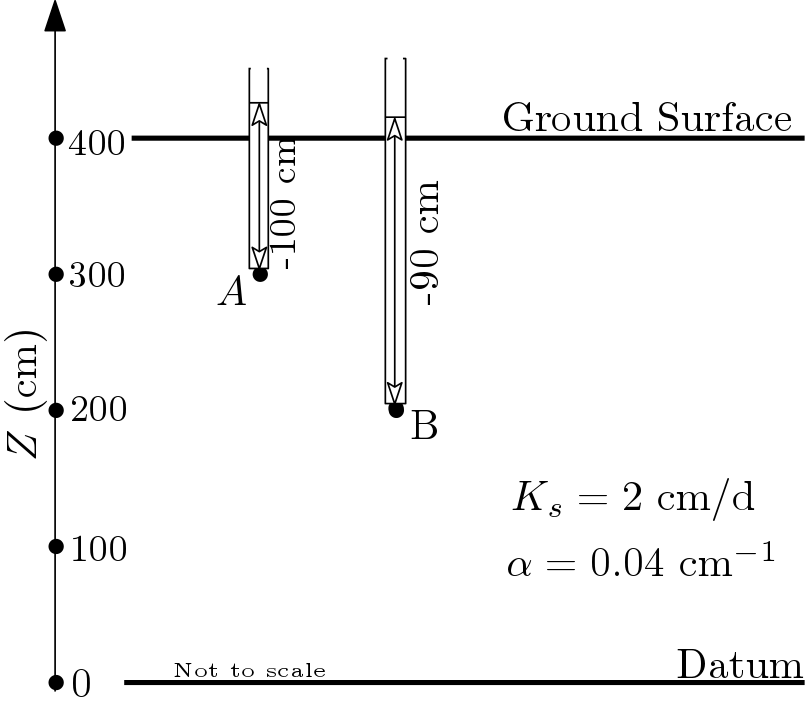

In [3]:
# Tutorial Problem 13

r2_1 = pn.pane.Markdown("""
### Tutorial Problem 13 """, width = 650, style={'font-size': '13pt'}) 

r2_2 = pn.pane.LaTeX(r"""


From the analysis of laboratory results the unsaturated hydraulic conductivity fits the following exponential 
model as a function of pressure head ($\psi$): $K(\psi) = K_s \exp(\alpha\cdot \psi)$, 
with $K_s$ [LT$^{-1}$] the saturated hydraulic conductivity and $\alpha$ [L$^{-1}$] a fit parameter. 
For the pressure head measurements and the data provided in the figure below, find $K(\psi)$. 
Also, find the Darcy velocity for this case.
""", width = 900, style={'font-size': '13pt'}) 

r2_3 =pn.pane.PNG("images/T04_a_1.png", width=400)


r2_4 = pn.pane.Markdown("""<br>
### Solution Tutorial Problem 13 """, width = 700, style={'font-size': '13pt'}) 

pn.Column(r2_1, r2_2, r2_3, r2_4) 

In [4]:
# Given

K_s = 2 # cm/d # saturated conductivity
al_a = 0.04 # 1/cm, fit constant
Ph_a = -100 # cm, pressure head at A
Ph_b = -90 # cm, pressure head at B
Z_a = 300 # cm, elevation head at A from datum
Z_b = 200 # cm, elevation head at B from datum

# Solution 1 
Ph_m = (Ph_a+Ph_b)/2 # mean pressure head
K_psi = K_s*np.exp(al_a*Ph_m)

#Solution 2
H_A = Ph_a+Z_a # cm, hydraulic head at A
H_B = Ph_b+Z_b # cm, hydraulic head at B
dh_dz = (H_B - H_A)/(Z_b - Z_a) # (-), hydraulic head gradient
q_z = -K_psi*dh_dz # cm/d, Darcy velocity 

print("The unsaturated conductiviy of the sample is: {0:1.3f}".format(K_psi), "cm/d")
print("The Darcy velocity is: {0:1.3f}".format(q_z), "cm/d") 
print("The negative sign indicates the direction opposite to increase in z.") 

The unsaturated conductiviy of the sample is: 0.045 cm/d
The Darcy velocity is: -0.040 cm/d
The negative sign indicates the direction opposite to increase in z.


# Tutorial Problem on Hydraulic Conductivities in Consolidated Media 


Column
    [0] Markdown(str, style={'font-size': '13pt'})
    [1] Spacer(width=50)
    [2] LaTeX(str, style={'font-size': '13pt'}, width=900)
    [3] Spacer(width=50)
    [4] PNG(str, width=300)
    [5] Spacer(width=150)
    [6] Markdown(str, style={'font-size': '13pt'}, width=700)
    [7] LaTeX(str, style={'font-size': '13pt'}, width=900)
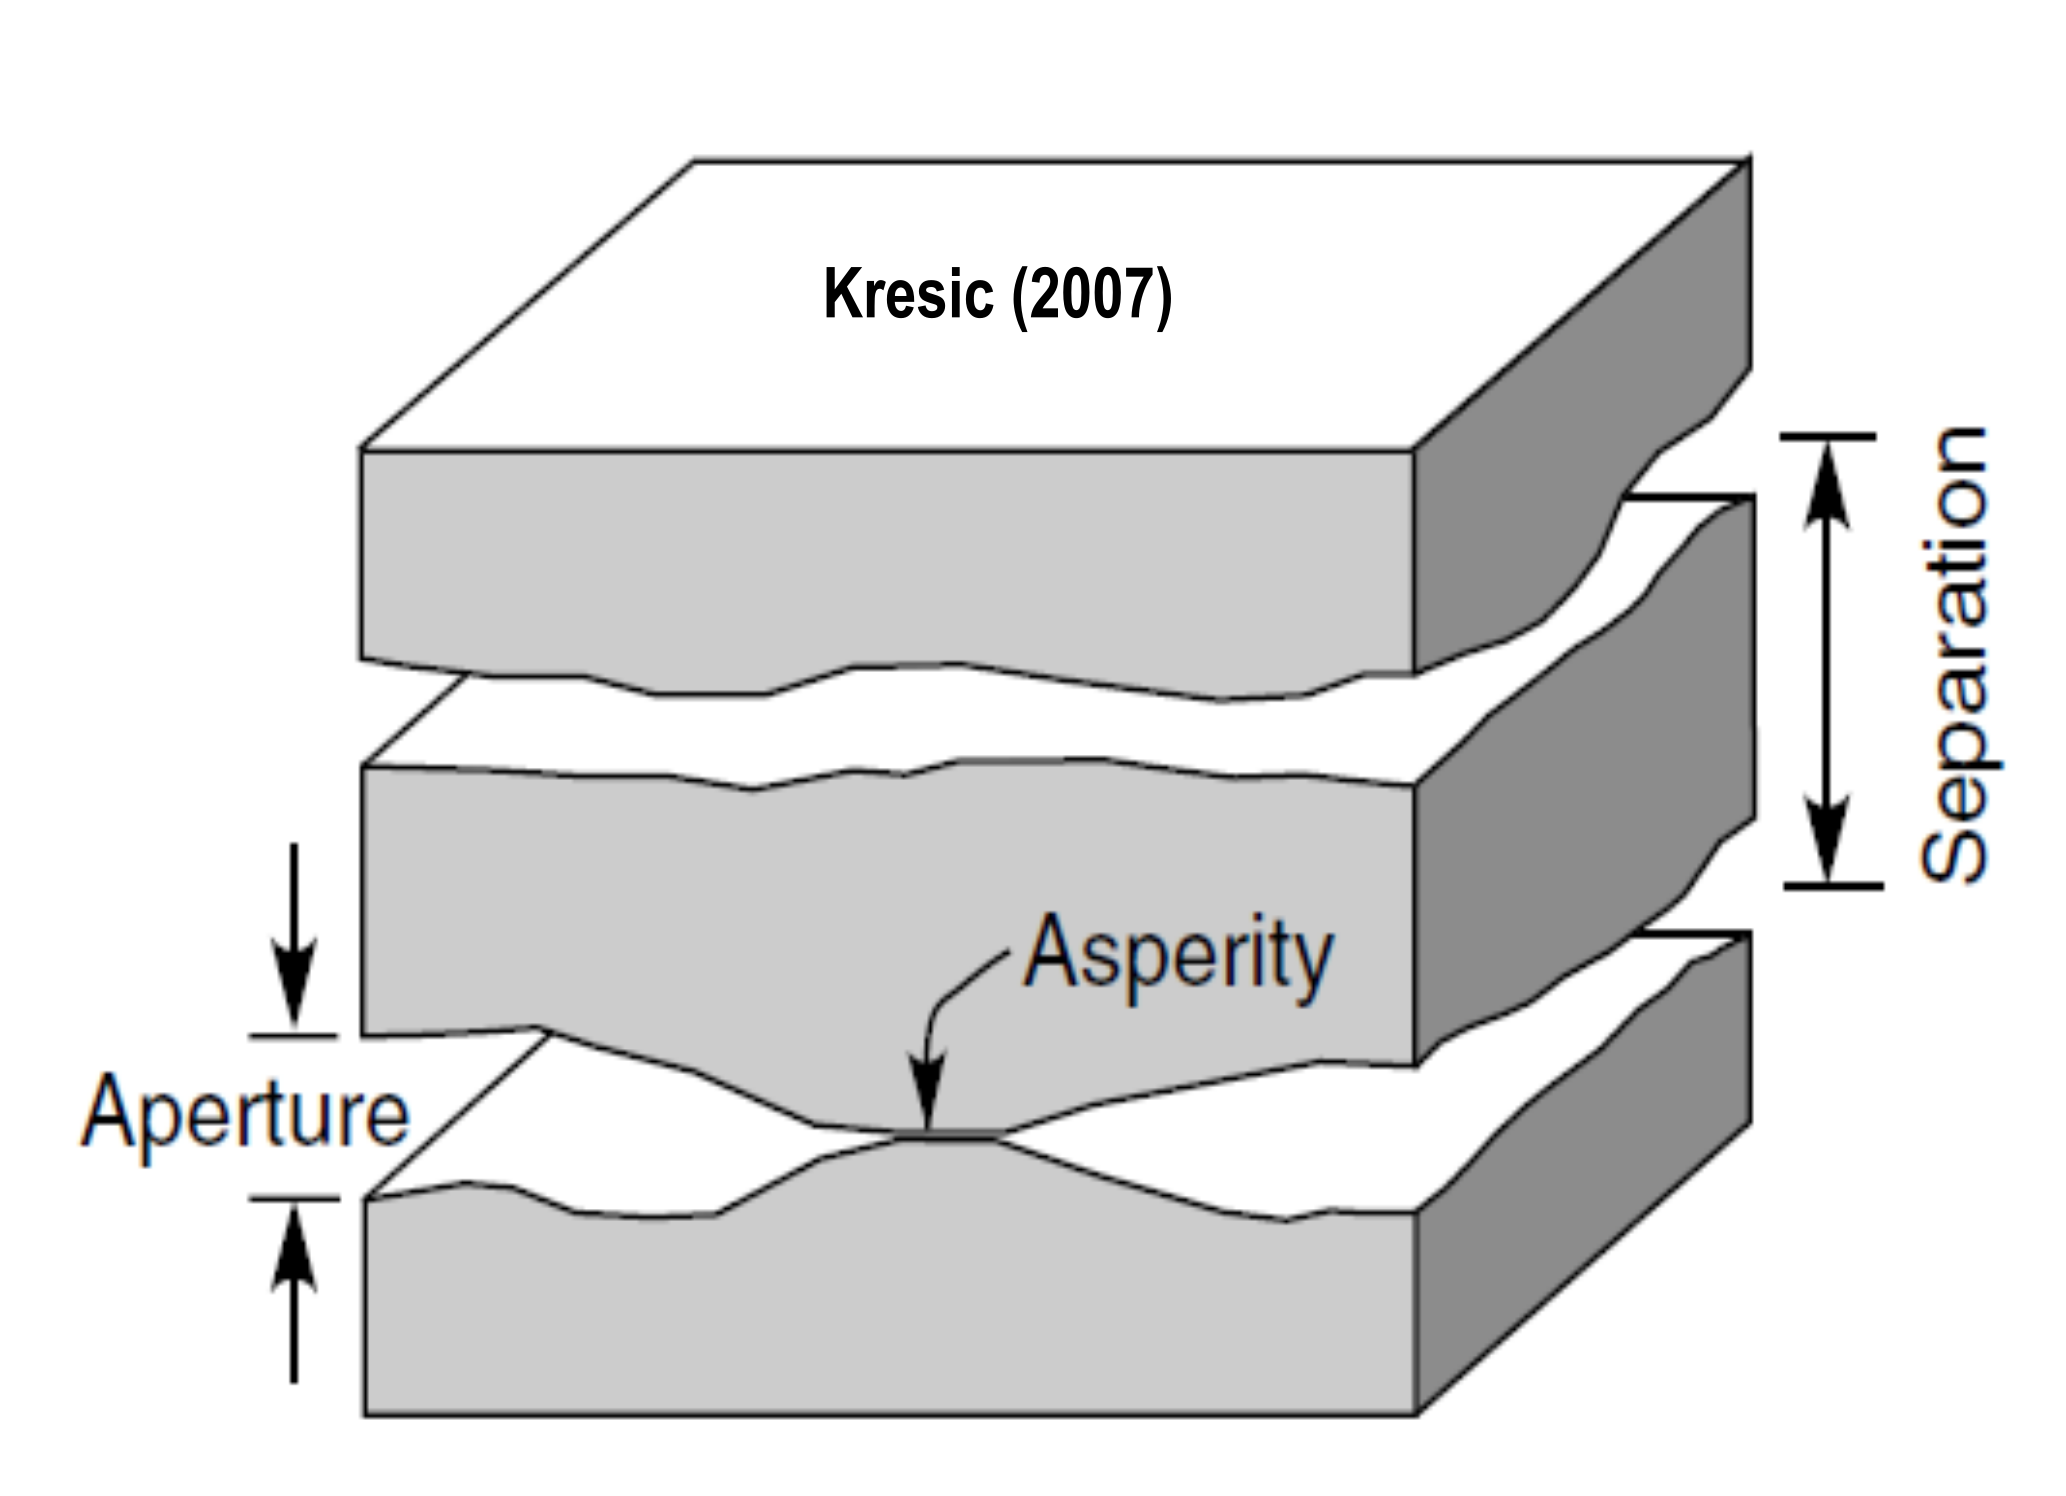

In [5]:
# Tutorial Problem 14
r3_1 = pn.pane.Markdown("""
## Tutorial Problem 14 """, style={'font-size': '13pt'})
spacer2=pn.Spacer(width=50)

r3_2 = pn.pane.LaTeX(r"""
Discharge of water at 9$^\circ C$ through the  fractured rock with a uniform fracture aperature $e = 0.1$ cm and width 1 m  is to be 
obtained. For simplicity, only a single fracture is considered (see figure below) and a hydraulic gradient = 0.001 is assumed. 
Additionally, the flow in the fracture is assumed to be laminar or Darcy conditions are valid. Available water propertiec at 9$^\circ C$ are:
dynamic viscosity $\mu$ =   0.0013465 N$\cdot$s/m$^2$ and density $\rho$ = 999.73 kg/m$^3$.
""", width = 900, style={'font-size': '13pt'})

r3_3 = pn.pane.PNG("images/T04_a_2.png", width=300)

spacer3=pn.Spacer(width=150)
r3_4 = pn.pane.Markdown("""<br>
### Solution Tutorial Problem 14
<br> **Check Lecture L02 slide 7 for more information**
""", width = 700, style={'font-size': '13pt'}) 
r3_5 = pn.pane.LaTeX(r"""
The conductivity $(K_s)$ in the single fracture can be obtained from:
$$
K_s = \frac{g \rho e^2}{12 \mu}
$$
where, $g =$ gravitational constant, $\rho =$ density of fluid, $e=$ fracture aperature and $\mu =$ dynamic viscocity  

""", width = 900, style={'font-size': '13pt'}) 

pn.Column(r3_1,spacer2, r3_2, spacer2, r3_3, spacer3, r3_4, r3_5)  

In [11]:
# Solution Problem 14

# Given
e_p = 0.01 # cm, Fracture aperature 
W = 1 # m, fracture width
mu_3 = 0.0013465 # N-s/m^2, dynamic visocity of water at 9°C
rho_3 = 999.73 # kg/m^3, density of water at 9°C
g_3 = 9.81 # N/kg, gravitational constant
i_3 = 0.001 # (), hydraulic head

#Solution 1
B_m = 0.1/100# m, unit conversion for B
K_3 = e_p**2*rho_3*g_3/(12*mu_3) # m/s, Conductivity of rock media
Q_3 = W*e_p*K_3*i_3 # Q = KiA - as Darcy's law is valid

print("The conductiviy of the fracture is: {0:1.3f}".format(K_3), "m/s")
print("The discharge from the rock is: {0:1.3f}".format(Q_3), "m\u00b3/s") 

The conductiviy of the fracture is: 60.697 m/s
The discharge from the rock is: 0.001 m³/s


### Tutorial Problem 15 ###

The effective porosity of individual matrix blocks within a fractured aquifer is 1.5 % and the hydraulic conductivity $K_{matrix}$ is $10^{-8}$
m/s. The average aperture of fractures is 35 $\mu$m with an average distance between fractures of 0.8 m. Water temperature is 9$^\circ C$.

a) Calculate the hydraulic conductivity of an individual fracture.

b) How much is the total hydraulic conductivity?

c) Calculate the average linear velocity (in m/a) within fractures and matrix blocks respectively under consideration of a
hydraulic gradient i = 0.001

<br>

### Solution of Tutorial Problem 15

For the composite (fracture + matrix), the conductivity ($K_t$) is obtained from:
$$
K_t = \frac{e}{F_d}K_s + K_{mat}
$$
which is equivalent to
$$
K_t = \frac{g \rho e^3}{12 F_d \mu} + K_{mat}
$$

where, $K_{mat}$ = matrix conductivity, and $F_d$ = average fracture distance

In [ ]:
# Solution 15, 

#Given are:
e_4 = 35*10**-6 # m, aperature  
F_d = 0.8 # m, average fracture distance  
K_mat = 10**-8# m/s, Hyd. Conductivity
n_e = 1.5/100# (), effective porosity in number
g_4 = 9.81 # N/kg, gravitational constant (known)
i_4 = 0.001

#Water properties at 9°C
mu_4 = 0.0013465 # N-s/m^2, dynamic visocity of water 
rho_4 = 999.73 # kg/m^3, density of water

#Solution (a), (b) and (c)
K_f = e_4**2*rho_4*g_4/(12*mu_4) # m/s, individual hydraulic conductivity see problem 14
K_o = e_4/F_d*K_f+ K_mat # m/s, total Hydraulic conductivity of mass
q_mat = K_mat*i_4 # m/s Darcy velocity in total matrix
v_mat = q_mat/n_e # m/s, linear velocity in total matrix
q_f = K_f*i_4 # Darcy's velocity in single fracture
v_f = q_f/F_d # Linear velocity in single fracture


#output
print("The conductivity of the single fracture is: {0:1.3e}".format(K_f), "m/s")
print("The conductivity of the total rock matrix is: {0:1.3e}".format(K_o), "m/s")
print("Linear velocity in total rock matrix is: {0:1.3e}".format(v_mat), "m/s")
print("Linear velocity in single fracture system is: {0:1.3e}".format(v_f), "m/s")


# Tutorial Problem on Flow-nets

Row
    [0] Markdown(str, style={'font-size': '13pt'}, width=400)
    [1] Spacer(width=50)
    [2] PNG(str, width=400)
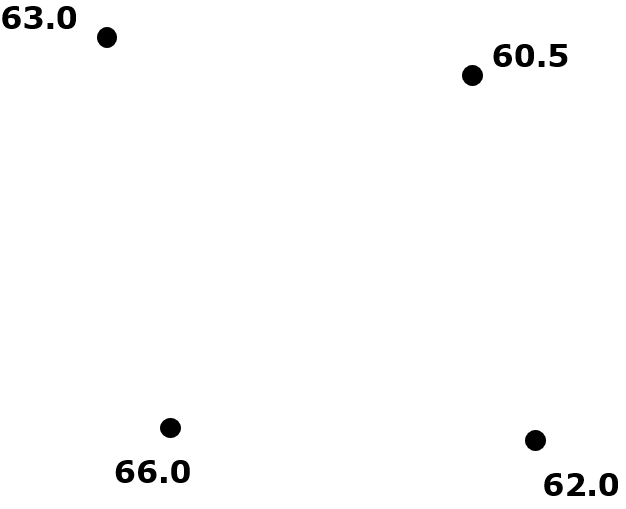

In [19]:
# Tutorial Problem 16
r5_1 = pn.pane.Markdown("""
### Tutorial Problem 16: Hydrologic Triangle
The figure below shows the position of four groundwater observation wells with measured hydraulic heads in m a.s.l. 
<br> <br>
**a.** Sketch head isolines for intervals of 1 m by applying the hydrologic triangle method.<br><br>
**b.** Indicate the flow direction.

""",width = 400, style={'font-size': '13pt'})

r5_2 = pn.pane.PNG("images/T03_TP12_a.png", width=400) 

pn.Row(r5_1,spacer2, r5_2)  

In [13]:
# 
r5_3 = pn.pane.Markdown("""
### Solution of Tutotrial Problem 16

Step 1. Connects all the points
""", width=600)

r5_2.object = "images/T03_TP12_b.png"
r5_3

Markdown(str, width=600)

In [15]:
#
r5_4 = pn.pane.Markdown("""
### Solution of Tutotrial Problem 16
Step 2. Divide the connected lines at equal head-level (here = 1 m)
""", width=600)
r5_2.object = "images/T03_TP12_c.png"
r5_4

Markdown(str, width=600)

In [16]:
#
r5_5 = pn.pane.Markdown("""
### Solution of Tutotrial Problem 16
Step 3. Join all the equal head lines 
""", width=600)
r5_2.object = "images/T03_TP12_d.png"
r5_5

Markdown(str, width=600)

In [18]:
#
r5_6 = pn.pane.Markdown("""
### Solution of Tutotrial Problem 16
Step 4. Mark the flow direction from higher head towards lower head
""", width=600)
r5_2.object = "images/T03_TP12_e.png"
r5_6

Markdown(str, width=600)

Column
    [0] Markdown(str, style={'font-size': '13pt'}, width=800)
    [1] Row
        [0] Column
            [0] Markdown(str, style={'font-size': '13pt'}, width=400)
            [1] PNG(str, width=200)
        [1] Column
            [0] Markdown(str, style={'font-size': '13pt'}, width=400)
            [1] PNG(str, width=200)
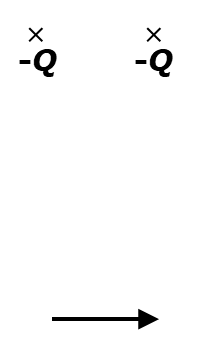
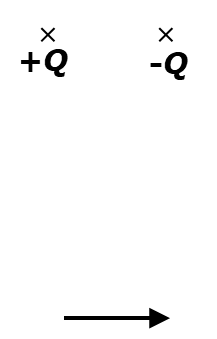

In [17]:
# Tutorial Problem 17
r6_1 = pn.pane.Markdown("""
##Tutorial Problem 17: Flow Nets##

Sketch head isolines and streamlines for the two configurations a) and b) of a well doublette shown below. In both cases flow nets should be sketched without and with the uniform flow component.

""",width=800,  style={'font-size': '13pt'})

r6_2 = pn.pane.Markdown("""
 a) withdrawal at both wells:<br><br><br>
""",width=400,  style={'font-size': '13pt'})

r6_3 = pn.pane.PNG("images/T03_TP13_a.png", width=200)  

r6_4 = pn.Column(r6_2,r6_3)

r6_5 = pn.pane.Markdown("""
 b) Injection at both wells:<br><br><br>
""",width=400,  style={'font-size': '13pt'})

r6_6 = pn.pane.PNG("images/T03_TP13_b.png", width=200)  

r6_7 = pn.Column(r6_5,r6_6)
r6_8 = pn.Row(r6_4, r6_7) 
pn.Column(r6_1, r6_8)

# HOMEWORK PROBLEMS


<br><br>

<font size="6" color="red">There is no obligation to submit the homework</font>

<br>

**You are encouraged to submit the homework as ipynb file to my email.**

**Pls. submit within the next 2 weeks times.**

In [8]:
#Homework Problem 5
r7_1= pn.pane.Markdown("""
###Homework Problem 5: 
""", width = 900, style={'font-size': '13pt'})

s3=pn.Spacer(width=150)

r7_2= pn.pane.LaTeX(r"""
In this problem we consider the roughness of the inner-surface of the facture
that can affect the conductivity of water (at 9$^\circ C$) in the rock matrix. In this example we consider
a composite rock matrix with average fracture aperature of 30 $\mu$m and the average 
spacing between fractures to be 0.5 m.  Further, we will consider a general relative roughness
of the inner surface ($\zeta$) of the fracture to be 0.4 and neglect the influence of non-fractured conductivity ($K_{mat}$). 
We find the effect of surface roughness on conductivity. 
""", width = 900, style={'font-size': '13pt'})

r7_3= pn.pane.Markdown("""
###Hint for solving homework problem 5: 
""", width = 900, style={'font-size': '13pt'})

r7_4= pn.pane.LaTeX(r"""
With surface roughness in consideration, the conductivity of rock matrix can be obtained from:
$$
K_t = \frac{g \rho e^3}{12 C F_d \mu} + K_{mat}
$$


With $ C = (1+ 8.8\zeta^{1.5})$ describes the fracture roughness for depending on relative roughness $\zeta$ 
""", width = 900, style={'font-size': '13pt'})
pn.Column(r7_1, s3, r7_2, s3, r7_3, s3, r7_4)


Column
    [0] Markdown(str, style={'font-size': '13pt'}, width=900)
    [1] Spacer(width=150)
    [2] LaTeX(str, style={'font-size': '13pt'}, width=900)
    [3] Spacer(width=150)
    [4] Markdown(str, style={'font-size': '13pt'}, width=900)
    [5] Spacer(width=150)
    [6] LaTeX(str, style={'font-size': '13pt'}, width=900)

Row
    [0] Markdown(str, style={'font-size': '13pt'}, width=500)
    [1] PNG(str, width=400)
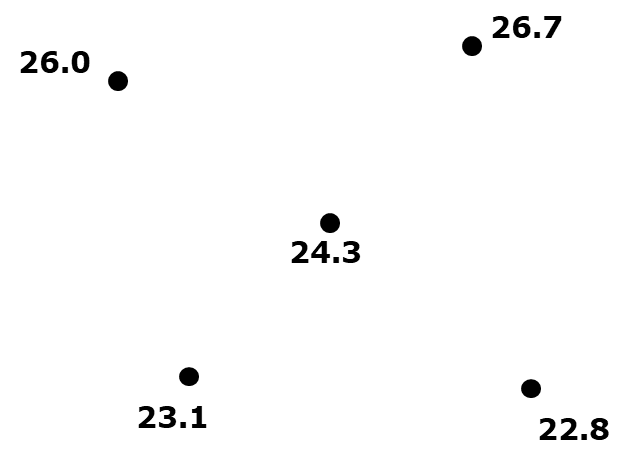

In [9]:
#
#
r10_1= pn.pane.Markdown("""
###Homework Problem 6: Hydrologic Triangle
The figure below shows the position of five groundwater observation wells with measured hydraulic heads in m a.s.l. 
 <br><br>

**a.** Sketch head isolines for intervals of 1 m by applying the hydrologic triangle method.
<br><br>
**b.** Indicate the flow direction.<br><br>
""", width = 500, style={'font-size': '13pt'})
r10_2 = pn.pane.PNG("images/T03_TH6.png", width=400)  

pn.Row(r10_1, r10_2)

Column
    [0] Markdown(str, style={'font-size': '13pt'}, width=900)
    [1] PNG(str, width=400)
    [2] Markdown(str, style={'font-size': '13pt'}, width=900)
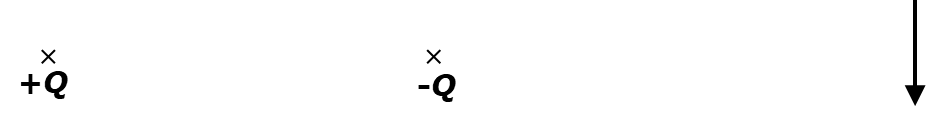

In [10]:
#
r11_1= pn.pane.Markdown("""
###Homework Problem 7: Flow Nets
Sketch head isolines and streamlines for the well doublette shown below. 
In this case, injection and withdrawal of groundwater is superimposed to a uniform flow component.
 <br><br><br><br><br><br>
 """, width = 900, style={'font-size': '13pt'})

r11_2 = pn.pane.PNG("images/T03_TH7.png", width=400)  

r11_3= pn.pane.Markdown("""
 <br><br><br><br><br><br>
 """, width = 900, style={'font-size': '13pt'})
pn.Column(r11_1, r11_2, r11_3)